In [166]:
import csv
import pandas as pd
import numpy as np
import pandas as pd
import re

In [167]:
import matplotlib.pyplot as plt

# Reading the tweets file 


In [168]:
tweets_file_df = pd.read_csv('tesla_tweets.csv')

In [169]:
tweets_file_df

,row ID,Tweet,Time,Retweet from,User
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk
...,...,...,...,...,...
3213,Row3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03,NaN,elonmusk
3214,Row3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31,NaN,elonmusk
3215,Row3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44,NaN,elonmusk
3216,Row3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46,NaN,elonmusk


In [170]:
tweets_file_df = tweets_file_df.drop(['User','Retweet from','row ID'], axis=1)
tweets_file_df.head(2)

,Tweet,Time
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54


In [171]:
tweets_file_df = tweets_file_df.rename(columns={'Time': 'Date'})
tweets_file_df.head(2)

,Tweet,Date
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54


In [172]:
# Converting the Date column into a date type instead of string type
tweets_file_df['Date'] = pd.to_datetime(tweets_file_df['Date'], dayfirst=True).dt.date

In [173]:
tweets_file_df

,Tweet,Date
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29
2,@bigajm Yup :),2017-09-29
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29
4,Fly to most places on Earth in under 30 mins a...,2017-09-29
...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20
3214,These articles in Space News describe why Aria...,2012-11-20
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20
3216,Just returned from a trip to London and Oxford...,2012-11-19


# Becuase there are many tweets on the same day we want to combine them

In [174]:
# Cleaning the tweets from spaciel characters
temp = pd.DataFrame(columns=['Date', 'Tweet'])
for index, row in tweets_file_df.iterrows():
    temp_text = row['Tweet']
    my_new_string = re.sub('[^ a-zA-Z0-9]', "", temp_text)
    temp.loc[len(temp)] = [tweets_file_df.loc[index, 'Date'],my_new_string]
    
    
temp['Tweet'] = temp['Tweet'].map(lambda x: x.lstrip('.-'))

In [175]:
temp

,Date,Tweet
0,2017-09-29,MeltingIce Assuming max acceleration of 2 to 3...
1,2017-09-29,RT SpaceX BFR is capable of transporting satel...
2,2017-09-29,bigajm Yup
3,2017-09-29,Part 2 httpstco8Fvu57muhM
4,2017-09-29,Fly to most places on Earth in under 30 mins a...
...,...,...
3213,2012-11-20,YOUSRC Amoss article was fair but his editor c...
3214,2012-11-20,These articles in Space News describe why Aria...
3215,2012-11-20,Was misquoted by BBC as saying Europes rocket ...
3216,2012-11-19,Just returned from a trip to London and Oxford...


Preparing the data for the sentiment analyzer, creating a copy of the data frame and analyzing the sentiment for each tweet and entering its average

In [176]:
sentiment_full_df = temp[['Date','Tweet']].copy()

In [177]:
# Sentiment analyzer eveluate 4 values : Compound, Negative, Positive, Neutral, each value ranges from -1 to 1
sentiment_full_df["Comp"] = ''
sentiment_full_df["Negative"] = ''
sentiment_full_df["Neutral"] = ''
sentiment_full_df["Positive"] = ''

In [178]:
import unicodedata
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_i_a = SentimentIntensityAnalyzer()

for index, row in temp.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', temp.loc[index, 'Tweet'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        
        sentiment_full_df.at[index, 'Comp'] = sentence_sentiment['compound']
        sentiment_full_df.at[index, 'Negative'] = sentence_sentiment['neg']
        sentiment_full_df.at[index, 'Neutral'] = sentence_sentiment['neu']
        sentiment_full_df.at[index, 'Positive'] = sentence_sentiment['pos']
        
    except TypeError:
        print(sentiment_full_df.loc[index, 'Tweet'])
        print(index)

In [179]:
sentiment_full_df

,Date,Tweet,Comp,Negative,Neutral,Positive
0,2017-09-29,MeltingIce Assuming max acceleration of 2 to 3...,0.8271,0.0,0.675,0.325
1,2017-09-29,RT SpaceX BFR is capable of transporting satel...,0.3818,0.0,0.894,0.106
2,2017-09-29,bigajm Yup,0.0,0.0,1.0,0.0
3,2017-09-29,Part 2 httpstco8Fvu57muhM,0.0,0.0,1.0,0.0
4,2017-09-29,Fly to most places on Earth in under 30 mins a...,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
3213,2012-11-20,YOUSRC Amoss article was fair but his editor c...,0.1655,0.0,0.92,0.08
3214,2012-11-20,These articles in Space News describe why Aria...,0.0,0.0,1.0,0.0
3215,2012-11-20,Was misquoted by BBC as saying Europes rocket ...,-0.1027,0.161,0.693,0.146
3216,2012-11-19,Just returned from a trip to London and Oxford...,0.6697,0.0,0.732,0.268


Calculating the average of each sentiment value : Comp, Negative, Neutral, Positive

Inserting the values of the averages to the new dataframe.

Eventually we will have one sentiment value for each date by his date tweets

In [180]:
dataframe = pd.DataFrame(columns=['Date','Comp','Negative','Neutral','Positive'])

count = 0
summ_comp = 0
summ_negative = 0
summ_neutral = 0
summ_positive = 0

for i in range(len(sentiment_full_df)-1):
    if sentiment_full_df.loc[i,'Date'] == sentiment_full_df.loc[i+1,'Date']:
        count += 1
        summ_comp += sentiment_full_df.loc[i,'Comp']
        summ_negative += sentiment_full_df.loc[i,'Negative']
        summ_neutral += sentiment_full_df.loc[i,'Neutral']
        summ_positive += sentiment_full_df.loc[i,'Positive']
    else:
        if count > 0:
            avg_comp = summ_comp / count
            avg_negative = summ_negative / count
            avg_neutral = summ_neutral / count
            avg_positive = summ_positive / count
            dataframe.loc[len(dataframe)] = [sentiment_full_df.loc[i,'Date'], avg_comp, avg_negative, avg_neutral, avg_positive]
        else:
            dataframe.loc[len(dataframe)] = [sentiment_full_df.loc[i,'Date'],
                                            sentiment_full_df.loc[i,'Comp'],
                                            sentiment_full_df.loc[i,'Negative'],
                                            sentiment_full_df.loc[i,'Neutral'],
                                            sentiment_full_df.loc[i,'Positive']]

        count=summ_comp=summ_negative=summ_neutral=summ_positive = 0 

# handle the last entry separately
if count > 0:
    avg_comp = summ_comp / count
    avg_negative = summ_negative / count
    avg_neutral = summ_neutral / count
    avg_positive = summ_positive / count
    dataframe.loc[len(dataframe)] = [sentiment_full_df.loc[i,'Date'], avg_comp, avg_negative, avg_neutral, avg_positive]
else:
    dataframe.loc[len(dataframe)] = [sentiment_full_df.loc[i,'Date'],
                                    sentiment_full_df.loc[i,'Comp'],
                                    sentiment_full_df.loc[i,'Negative'],
                                    sentiment_full_df.loc[i,'Neutral'],
                                    sentiment_full_df.loc[i,'Positive']]

In [181]:
dataframe

,Date,Comp,Negative,Neutral,Positive
0,2017-09-29,0.227890,0.00000,0.90250,0.0975
1,2017-09-28,0.411250,0.00000,0.67250,0.3275
2,2017-09-27,0.000000,0.00000,1.00000,0.0000
3,2017-09-26,0.484133,0.00000,0.51400,0.4860
4,2017-09-25,0.379300,0.00000,0.55300,0.4470
...,...,...,...,...,...
887,2012-11-22,0.229400,0.00000,0.90000,0.1000
888,2012-11-21,0.385850,0.00000,0.84550,0.1545
889,2012-11-20,-0.206225,0.13425,0.78425,0.0815
890,2012-11-19,0.669700,0.00000,0.73200,0.2680


 # Adding Price column to the tweets and date dataframe

In [182]:
stock_price = pd.read_csv('tsla_stock_price.csv')

In [183]:
stock_price

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-11-15,31.440001,30.500000,31.299999,30.820000,984000,30.820000
1,2012-11-16,32.000000,30.590000,31.150000,31.840000,908700,31.840000
2,2012-11-19,33.250000,31.840000,32.070000,32.919998,1392400,32.919998
3,2012-11-20,33.099998,31.910000,32.799999,33.000000,922500,33.000000
4,2012-11-21,33.470001,32.290001,32.610001,32.470001,963200,32.470001
...,...,...,...,...,...,...,...
1222,2017-09-25,357.470001,342.880005,353.149994,344.989990,7605900,344.989990
1223,2017-09-26,351.239990,340.899994,350.929993,345.250000,7156300,345.250000
1224,2017-09-27,351.489990,340.500000,349.899994,340.970001,6060300,340.970001
1225,2017-09-28,342.750000,335.399994,339.880005,339.600006,5319600,339.600006


# Combining the stock price and the tweets date into one data frame

In [184]:
dataframe['adj_close_price'] = ''
for index_api, row_api in dataframe.iterrows():
    for index_csv, row_csv in stock_price.iterrows():
        if str(row_api['Date']) == str(row_csv['Date']):
            dataframe.loc[index_api, 'adj_close_price'] = format(row_csv['Adj Close'], '.2f')

In [186]:
dataframe

,Date,Comp,Negative,Neutral,Positive,adj_close_price
0,2017-09-29,0.227890,0.00000,0.90250,0.0975,341.10
1,2017-09-28,0.411250,0.00000,0.67250,0.3275,339.60
2,2017-09-27,0.000000,0.00000,1.00000,0.0000,340.97
3,2017-09-26,0.484133,0.00000,0.51400,0.4860,345.25
4,2017-09-25,0.379300,0.00000,0.55300,0.4470,344.99
...,...,...,...,...,...,...
887,2012-11-22,0.229400,0.00000,0.90000,0.1000,
888,2012-11-21,0.385850,0.00000,0.84550,0.1545,32.47
889,2012-11-20,-0.206225,0.13425,0.78425,0.0815,33.00
890,2012-11-19,0.669700,0.00000,0.73200,0.2680,32.92


# Adding average prices to the blank cells in the prices

some of the prices dont have a value becuase maybe its weekend or holiday which mean stock prices dont move but people tweet


In [188]:
# Assigning the value 0 to the blank cells and converting the column into a float type
for index, row in dataframe.iterrows():
        if row['adj_close_price'] == '':
            dataframe.loc[index, 'adj_close_price'] = 0
dataframe['adj_close_price'] = dataframe['adj_close_price'].astype(float)

In [189]:
n = 0
for i in range(len(dataframe)):
    if (dataframe.loc[i, 'adj_close_price'] == 0):
        flag = True
        n = i
        while flag:
            if (dataframe.loc[n+1,'adj_close_price'] == 0):
                n += 1
            else:
                num1 = float(dataframe.loc[i-1,'adj_close_price'])
                num2 = float(dataframe.loc[n+1,'adj_close_price'])
                mean = (num1+num2)/2
                dataframe.loc[i, 'adj_close_price'] = mean
                flag = False

In [190]:
dataframe

,Date,Comp,Negative,Neutral,Positive,adj_close_price
0,2017-09-29,0.227890,0.00000,0.90250,0.0975,341.10
1,2017-09-28,0.411250,0.00000,0.67250,0.3275,339.60
2,2017-09-27,0.000000,0.00000,1.00000,0.0000,340.97
3,2017-09-26,0.484133,0.00000,0.51400,0.4860,345.25
4,2017-09-25,0.379300,0.00000,0.55300,0.4470,344.99
...,...,...,...,...,...,...
887,2012-11-22,0.229400,0.00000,0.90000,0.1000,32.30
888,2012-11-21,0.385850,0.00000,0.84550,0.1545,32.47
889,2012-11-20,-0.206225,0.13425,0.78425,0.0815,33.00
890,2012-11-19,0.669700,0.00000,0.73200,0.2680,32.92


In [192]:
dataframe = dataframe.sort_values('Date', ascending=True)

In [194]:
dataframe.reset_index(inplace=True, drop=True)

In [195]:
dataframe

,Date,Comp,Negative,Neutral,Positive,adj_close_price
0,2012-11-19,0.669700,0.00000,0.73200,0.2680,32.92
1,2012-11-19,0.669700,0.00000,0.73200,0.2680,32.92
2,2012-11-20,-0.206225,0.13425,0.78425,0.0815,33.00
3,2012-11-21,0.385850,0.00000,0.84550,0.1545,32.47
4,2012-11-22,0.229400,0.00000,0.90000,0.1000,32.30
...,...,...,...,...,...,...
887,2017-09-25,0.379300,0.00000,0.55300,0.4470,344.99
888,2017-09-26,0.484133,0.00000,0.51400,0.4860,345.25
889,2017-09-27,0.000000,0.00000,1.00000,0.0000,340.97
890,2017-09-28,0.411250,0.00000,0.67250,0.3275,339.60


# Creating a pie plot to show how many negative/positive/neutral tweets exist

% of positive tweets=  60.65
% of negative tweets=  15.81
% of neutral tweets=  23.54


[]

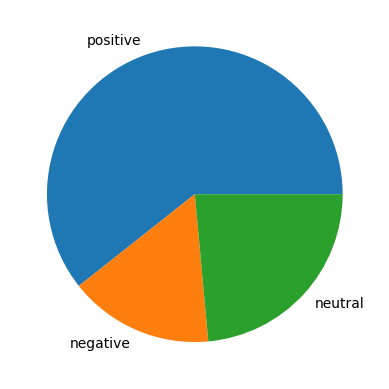

In [196]:
posi=0
nega=0
neu=0
for i in range(len(dataframe)):
    get_val=dataframe.Comp[i]
    if float(get_val) < 0:
        nega += 1
    if float(get_val) > 0:
        posi += 1
    if get_val == 0 :
        neu  += 1
posper = (posi/(len(dataframe)))*100
negper = (nega/(len(dataframe)))*100
neuper = (neu/(len(dataframe)))*100
print("% of positive tweets= ",format(posper, '.2f'))
print("% of negative tweets= ",format(negper, '.2f'))
print("% of neutral tweets= ",format(neuper, '.2f'))
arr=np.asarray([posper,negper,neuper], dtype=float)
plt.pie(arr,labels=['positive','negative','neutral'])
plt.plot()

In [197]:
# Reorder the columns oreder
dataframe = dataframe.rename(columns={'adj_close_price': 'Close Price'})
dataframe = dataframe[['Close Price','Comp','Negative','Neutral','Positive','Date']]

In [198]:
dataframe

,Close Price,Comp,Negative,Neutral,Positive,Date
0,32.92,0.669700,0.00000,0.73200,0.2680,2012-11-19
1,32.92,0.669700,0.00000,0.73200,0.2680,2012-11-19
2,33.00,-0.206225,0.13425,0.78425,0.0815,2012-11-20
3,32.47,0.385850,0.00000,0.84550,0.1545,2012-11-21
4,32.30,0.229400,0.00000,0.90000,0.1000,2012-11-22
...,...,...,...,...,...,...
887,344.99,0.379300,0.00000,0.55300,0.4470,2017-09-25
888,345.25,0.484133,0.00000,0.51400,0.4860,2017-09-26
889,340.97,0.000000,0.00000,1.00000,0.0000,2017-09-27
890,339.60,0.411250,0.00000,0.67250,0.3275,2017-09-28


# Predicting the price - machine learning using sklearn library

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

train data will be 70% of then values and tesing will be 30%

In [243]:
# Train data set
train = dataframe.loc[0:620]

X_train = train.drop(['Date','Close Price'],axis=1)
y_train = train['Close Price']

In [244]:
# Test data set 
test = dataframe.loc[621:892]

X_test = test.drop(['Date','Close Price'],axis=1)
y_test = test['Close Price']

In [251]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# X_train are the sentiment values such as Comp Negative... , y_train is the actual price for thos stats.
# So basically we are teaching the machine what is the stock price for each sentiment values.

RandomForestRegressor()

In [252]:
prediction = rf.predict(X_test) # we insert the test value and get the machine prediction, the reall prices are y_test so we compare them

In [253]:
plot_df = pd.DataFrame(columns=['Actual Price', 'Predicted_price'])

In [254]:
plot_df['Actual Price'] = y_test
plot_df['Predicted_price'] = prediction

In [255]:
plot_df

,Actual Price,Predicted_price
621,194.865,201.661388
622,195.260,172.301925
623,196.050,203.848255
624,196.410,192.173150
625,205.400,184.697200
...,...,...
887,344.990,189.572473
888,345.250,204.970527
889,340.970,195.398628
890,339.600,75.480475


<Figure size 4000x4000 with 0 Axes>

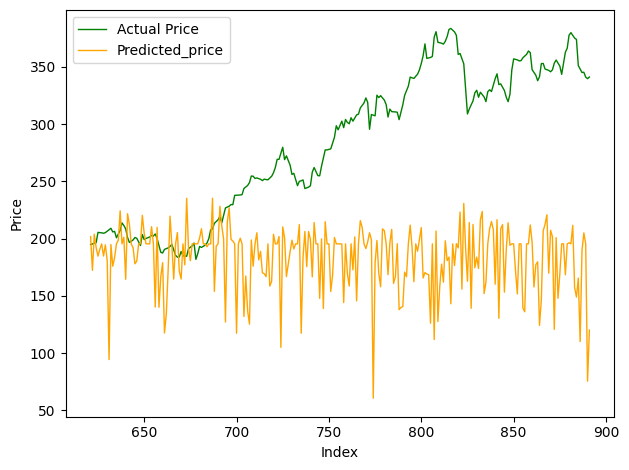

In [256]:
# Increase figure size
plt.figure(figsize=(40, 40))

# Plot the data with wider spacing
plot_df.plot(color=['green', 'orange'], linewidth=1)

# Set the axis labels
plt.xlabel('Index')
plt.ylabel('Price')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()